selecting features: remove features with very low variance (very close to 0) >> do not add any value to any model at all


In [ ]:
# Scikit-learn has an implementation for VarianceThreshold ---
from sklearn.feature_selection import VarianceThreshold
data = ---
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)


In [2]:
#also remove features which have a high correlation ...
#Using Pearson correlation: calculating the correlation between different numerical features
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

#fetch a regression dataset
data  = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
#convert to pandas dataframe 
df = pd.DataFrame(X, columns= col_names)
#introduce a highly correlated column 
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)

#get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


feature MedInc_Sqrt has  a very high correlation with MedInc >> remove one of them...
**Univariate feature selection**: a scoring of each feature against a given target, example: Mutual information, ANOVA F-test, chi^2. Two ways of using these in scikit-learn:
    - SelectKBest: keeps the top-k scoring features
    - SelectPercentile: keeps the top features which are in a percentage specified by the user
Note: chi^2 only for data which is non-negative in nature...


In [6]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile


class UnivariateFeatureSelction:
   
    def __init__(self, n_features, problem_type, scoring):
         # n_features: SelectPercentile if float else SelectKBest
        # problem_type: classification or regression
        # scoring: scoring function, string
        
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
                }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
                }
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        # if n_features is int, we use selectkbest
        # if n_features is float, we use selectpercentile
        # please note that it is int in both cases in sklearn
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k = n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
                )
        else:
            raise Exception("Invalid type of feature")
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [7]:
ufs = UnivariateFeatureSelction(n_features=0.1, problem_type="regression",scoring = "f_regression")
ufs.fit(X, y)
X_transformed = ufs.transform(X)

**Feature selection using a machine learning model**

In [ ]:
"""
Greedy feature selection
- choose a model
- select a loss/scoring function
-  iteratively evaluate each feature and add it to the list of “good” features if it improves loss/score
Cons: 
- computational cost is very high >> take a lot of time 
- don't use this feature selection properly >> overfiting the model 
"""

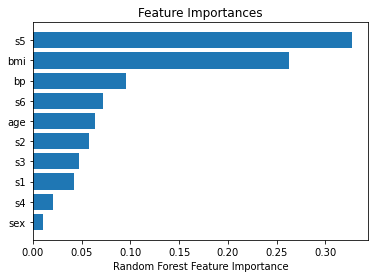

In [9]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [10]:
# SelectFromModel 
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = RandomForestRegressor()

# select from the model
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)

# see which features were selected
support = sfm.get_support()
# get feature names
print([
    x for x, y in zip(col_names, support) if y == True
])

['bmi', 's5']


Note: Select features on training data and validate the model on validation data for proper selection of features without overfiting the model 
